In [1]:
pip install ftfy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install wordcloud

In [5]:
import ftfy #fix text for you:  it helps fix common issues related to text encoding and Unicode
import nltk #toolkit..classification,stremming,stopwords
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings


from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')


from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier # need to import xboost calssifer

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

warnings.filterwarnings('ignore')
np.random.seed(0)

In [6]:
import pandas as pd
train = pd.read_csv('train.tsv', delimiter='\t', quoting=3, header=None)
test = pd.read_csv('test.tsv', delimiter='\t', quoting=3, header=None)
valid = pd.read_csv('valid.tsv', delimiter='\t', quoting=3, header=None)

In [7]:
df_raw = pd.concat([train, test, valid], axis=0, sort=False)
df_raw = df_raw.sample(frac=1).reset_index()#shuffeling the data set
df_raw.head(2)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,8289,423.json,true,"""McCain opposes a woman's right to choose.""",abortion,moveon,NaN,NaN,democrat,2,4,3,0,0,an e-mail message
1,1156,10379.json,barely-true,The name Frank has risen in popularity by 20 p...,pop-culture,matt-lauer,Today Show host,NaN,none,1,0,0,0,0,a red carpet interview before the Golden Globes


In [8]:
df_raw.shape

(12836, 15)

In [9]:
df_raw.columns=["index","ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]

In [10]:
df_raw.head(5)

,index,ID,label,statement,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,8289,423.json,true,"""McCain opposes a woman's right to choose.""",abortion,moveon,NaN,NaN,democrat,2,4,3,0,0,an e-mail message
1,1156,10379.json,barely-true,The name Frank has risen in popularity by 20 p...,pop-culture,matt-lauer,Today Show host,NaN,none,1,0,0,0,0,a red carpet interview before the Golden Globes
2,5306,12759.json,pants-fire,Says Ted Cruz never denied his father was phot...,"candidates-biography,crime,history",donald-trump,President-Elect,New York,republican,63,114,51,37,61,a campaign rally in Cleveland
3,9463,8896.json,true,Its been 14 years since a president or a vice ...,sports,candy-crowley,CNN host,NaN,none,0,0,0,0,0,"comments on CNN's ""State of the Union"""
4,3638,11241.json,half-true,"In the year 2013, the Obama administration rel...","crime,criminal-justice,immigration",ted-cruz,Senator,Texas,republican,36,33,15,19,8,answering a reporter in Iowa


In [11]:
df_raw['statement'].head(10).tolist()

['"McCain opposes a woman\'s right to choose."',
 'The name Frank has risen in popularity by 20 percent since the debut of House of Cardson Netflix.',
 'Says Ted Cruz never denied his father was photographedwith Lee Harvey Oswald.',
 'Its been 14 years since a president or a vice president or a member of their family has not gone and attended at least an event at the Olympics.',
 'In the year 2013, the Obama administration released 104,000 criminal illegal aliens. They released 196 murderers people with homicide convictions, who are here illegally.',
 'Says the United States does not trade as much as other developed nations.',
 '"Oil companies ...currently have 68-million acres that they\'re not using."',
 'Says 24 million people in this country cant find a full-time job, 50 million cant see a doctor when theyre sick, 47 million people need government help to feed themselves and 15 million families owe more than the value of their home.',
 'President Obama went around the world and apo

In [12]:
df_raw['speaker'].head(20).tolist()

['moveon',
 'matt-lauer',
 'donald-trump',
 'candy-crowley',
 'ted-cruz',
 'rob-portman',
 'barack-obama',
 'alan-grayson',
 'mitt-romney',
 'joe-biden',
 'ellen-rosenblum',
 'linda-finn',
 'us-chamber-commerce',
 'tom-barrett',
 'chris-christie',
 'russell-edwards',
 'mitt-romney',
 'jeff-merkley',
 'rush-limbaugh',
 'john-boehner']

### Exploratory Data Analysis

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

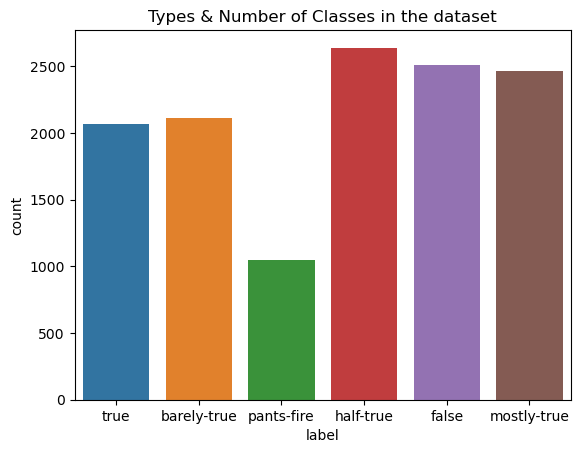

In [13]:
sns.countplot(x='label',data=df_raw)
plt.title('Types & Number of Classes in the dataset')

In [14]:
def plot_sns_chart(dataframe, y_axis, class_separator=None, width=20.0, height=9.0, 
                   font_scale=2, title = 'Title has not been set',
                   xlabel_title="Xlabel title not been set", ylabel_title="Ylabel title not been set",
                   colors=None):
    plt.rcParams['figure.figsize'] = [width, height]
    plt.legend(['Legend'], loc='right')
    sns.set(font_scale=font_scale)
    g = sns.countplot(y=y_axis, hue=class_separator, data=dataframe, palette=colors)
    g.set(xlabel=xlabel_title, ylabel=ylabel_title)
    g.set_title(title)
    total = float(len(dataframe))
    margin = 0.0025
    for patch in g.patches:
        percentage = ' {:.1f}%'.format(100 * patch.get_width() / total)
        x = patch.get_width() + (patch.get_width() * margin)
        y = patch.get_y() + (patch.get_height() / 2) 
        g.annotate(percentage, (x, y), va='center')
    
colors_verdict = {'pants-fire': "#ea5545", 
                  'false': "#f46a9b", 
                  'mostly-false': "#ef9b20",
                  'half-true': "#edbf33",
                  'mostly-true': "#ede15b",
                  'true': "#bdcf32",
                  'barely-true':"#ea5545"
                 }

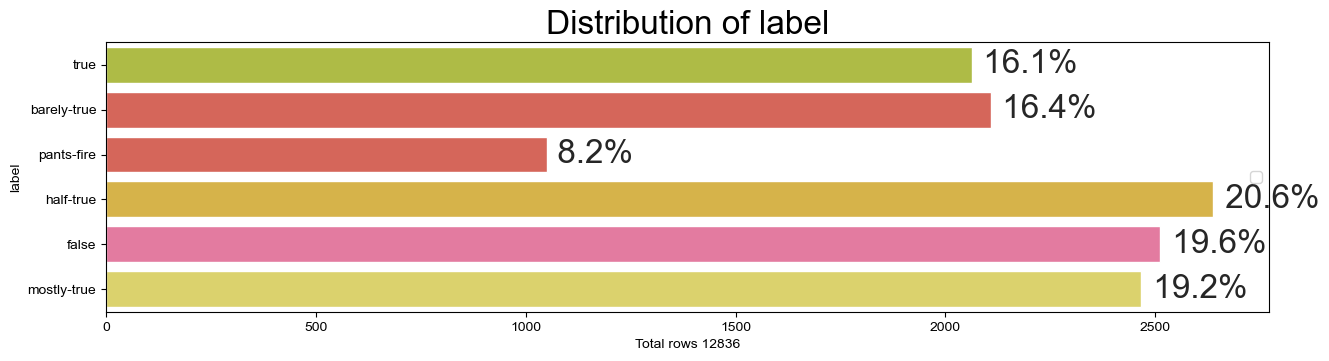

In [15]:
plot_sns_chart(df_raw, 'label', width=15.0, height=3.5, 
               title=f'Distribution of label',
               ylabel_title='label', 
               xlabel_title=f'Total rows {df_raw.shape[0]}',
               colors=colors_verdict)

###  Converting multiclass labels to two classes - Fake and True for exploratory data analysis

In [16]:
data = df_raw.iloc[:, [2, 3]]
data

,label,statement
0,true,"""McCain opposes a woman's right to choose."""
1,barely-true,The name Frank has risen in popularity by 20 p...
2,pants-fire,Says Ted Cruz never denied his father was phot...
3,true,Its been 14 years since a president or a vice ...
4,half-true,"In the year 2013, the Obama administration rel..."
...,...,...
12831,pants-fire,McDonalds hamburgers are only 15 percent real ...
12832,barely-true,The U.S. has over $62 trillion in unfunded lia...
12833,barely-true,While Arkansas seniors depend on Social Securi...
12834,false,Scientists have shown us (that) the greater po...


In [17]:
def binary_class_dataset(data):
    
    data = data.iloc[:, [2, 3]]
    data.columns = ['label', 'statement']
    Original_labels = {
        'true': 'True',
        'mostly-true': 'True',
        'half-true': 'True',
        'false': 'Fake',
        'barely-true': 'Fake',
        'pants-fire': 'Fake'
    }
    data['label'] = data['label'].map(Original_labels)

    return data

In [18]:
bi_class= binary_class_dataset(df_raw)

In [19]:
bi_class.head(2)

,label,statement
0,True,"""McCain opposes a woman's right to choose."""
1,Fake,The name Frank has risen in popularity by 20 p...


### Creating Word Clouds for the text 'statements' 

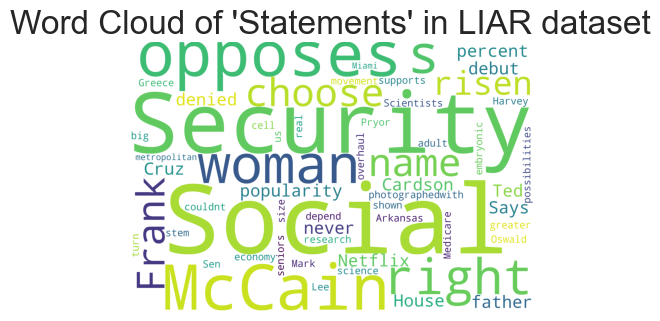

In [20]:
from wordcloud import STOPWORDS, WordCloud
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = bi_class['statement'].values #converted to numpy array
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Statements' in LIAR dataset")
plt.show()

In [21]:
# creating two dataset consisting of True and Fake statements seperately
np.random.seed(0)
true_statements_dataset = bi_class[bi_class['label'].astype(str) == 'True']
fake_statements_dataset = bi_class[bi_class['label'].astype(str) == 'Fake']

In [22]:
# contains only TRUE statements
np.random.seed(0)
true_statements_dataset.head(5)

,label,statement
0,True,"""McCain opposes a woman's right to choose."""
3,True,Its been 14 years since a president or a vice ...
4,True,"In the year 2013, the Obama administration rel..."
5,True,Says the United States does not trade as much ...
7,True,Says 24 million people in this country cant fi...


In [23]:
# contains only FAKE statements
np.random.seed(0)
fake_statements_dataset.head(5)

,label,statement
1,Fake,The name Frank has risen in popularity by 20 p...
2,Fake,Says Ted Cruz never denied his father was phot...
6,Fake,"""Oil companies ...currently have 68-million ac..."
8,Fake,President Obama went around the world and apol...
12,Fake,The new health care law crushes small business...


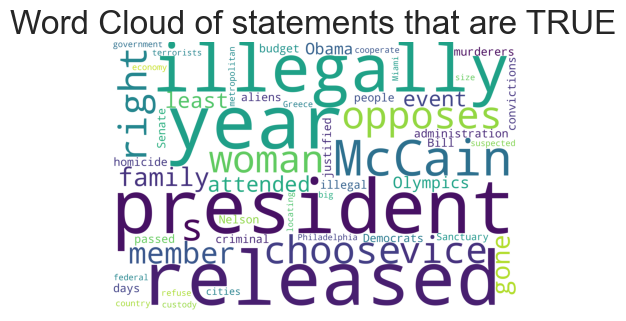

In [24]:
np.random.seed(0)
# creating word cloud for only those statements that are TRUE
text_true = true_statements_dataset['statement'].values
wordcloud_true = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_true))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title("Word Cloud of statements that are TRUE")
plt.show()

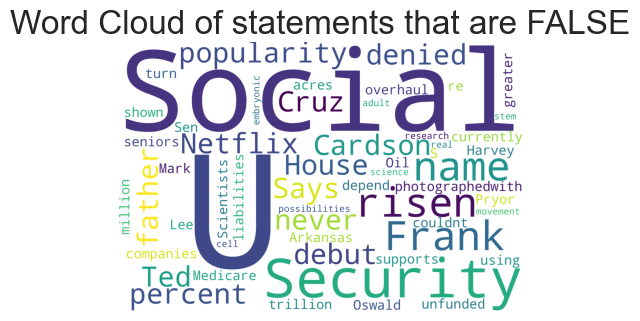

In [25]:
np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_false = fake_statements_dataset['statement'].values
wordcloud_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_false))
plt.imshow(wordcloud_false)
plt.axis('off')
plt.title("Word Cloud of statements that are FALSE")
plt.show()

In [26]:
df_raw1= bi_class.copy()

In [27]:
df_raw1

,label,statement
0,True,"""McCain opposes a woman's right to choose."""
1,Fake,The name Frank has risen in popularity by 20 p...
2,Fake,Says Ted Cruz never denied his father was phot...
3,True,Its been 14 years since a president or a vice ...
4,True,"In the year 2013, the Obama administration rel..."
...,...,...
12831,Fake,McDonalds hamburgers are only 15 percent real ...
12832,Fake,The U.S. has over $62 trillion in unfunded lia...
12833,Fake,While Arkansas seniors depend on Social Securi...
12834,Fake,Scientists have shown us (that) the greater po...


### Exploring the 'speakers'

In [28]:
speakers_data = df_raw.copy()
speakers = speakers_data['speaker'].unique()

print("The total number of speakers in the LIAR dataset is : %d  " % len(speakers))
print()
print("Some sample speakers are:\n", speakers[:10].tolist())

The total number of speakers in the LIAR dataset is : 3318  

Some sample speakers are:
 ['moveon', 'matt-lauer', 'donald-trump', 'candy-crowley', 'ted-cruz', 'rob-portman', 'barack-obama', 'alan-grayson', 'mitt-romney', 'joe-biden']


In [29]:
speakers_cts = speakers_data.groupby("speaker").statement.count()
speakers = speakers_cts[speakers_cts > 100] # speakers who have made more than 100 statements.
print("There are %d speakers who have made statements more than 50 times in the dataset" % len(speakers))
print()
print("Some of the speakers and the number of statements made by them are:\n", speakers[:10])

There are 13 speakers who have made statements more than 50 times in the dataset

Some of the speakers and the number of statements made by them are:
 speaker
barack-obama       616
bernie-s           107
chain-email        178
chris-christie     105
donald-trump       344
hillary-clinton    297
john-mccain        189
marco-rubio        153
mitt-romney        216
rick-perry         173
Name: statement, dtype: int64


In [30]:
#prominent speakers
speakers_data = speakers_data[speakers_data['speaker'].isin(speakers.keys())]

In [31]:
"""function to groupby the speakers by the class and count of statements spoken by them"""

def class_counts(data, column):
    return data.groupby([column,"label"]).agg({"ID" : "count"}) #id kitni baar aa rgi hai jab group mai hai column and label


### Plot of top 13 speakers labelled by class and count of statements they have given.

In [32]:
breakdown = class_counts(speakers_data, 'speaker')
breakdown

ID
speaker      label           
barack-obama barely-true   70
             false         84
             half-true    165
             mostly-true  163
             pants-fire     9
...                       ...
ted-cruz     false         34
             half-true     15
             mostly-true   19
             pants-fire     8
             true           7

[77 rows x 1 columns]

Text(0.5, 1.0, 'Top 13 speakers in the LIAR dataset with count and class of statements made')

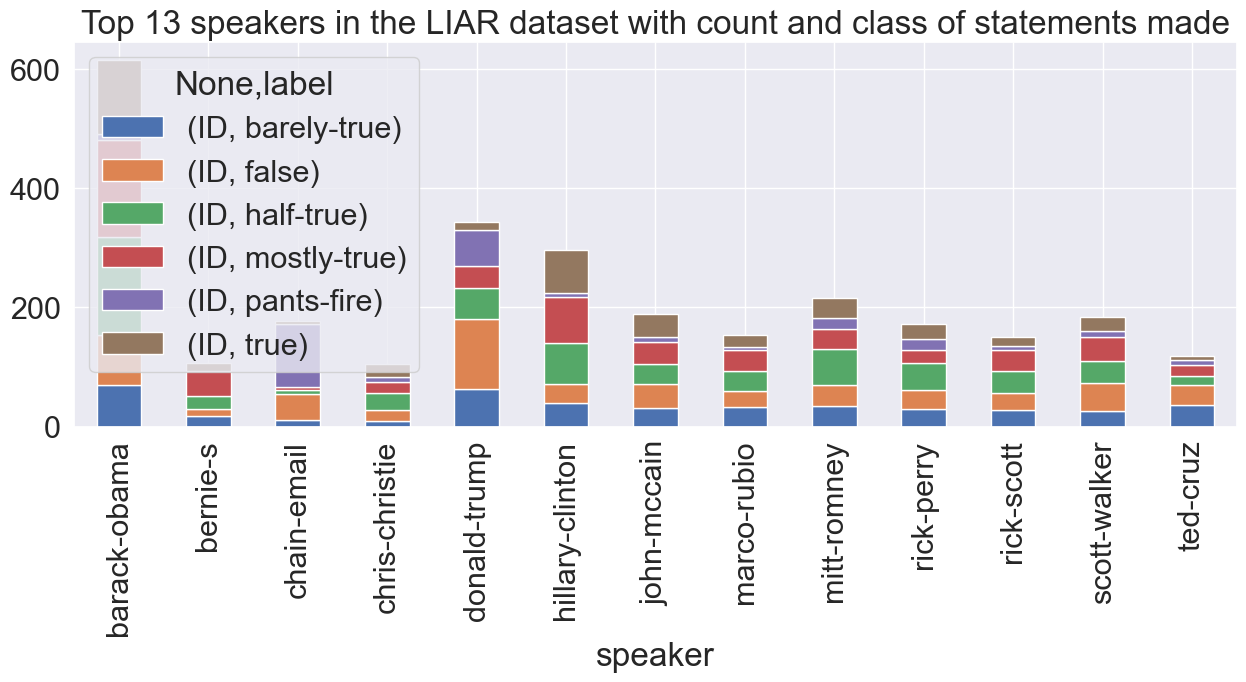

In [33]:
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Top 13 speakers in the LIAR dataset with count and class of statements made")

In [34]:
# Function for Normalising the statements and the speakers for comparison purpose

def normalize(data, column):
    norm = data.reset_index()
    norm = norm.set_index([column,'label'])['ID'].unstack(fill_value=0) #issues

    row_totals = norm.sum(axis=1)
    for row in range(len(norm.index)):
        norm.iloc[row]/= row_totals[row]

    norm = norm.stack().reset_index(name='Percent').set_index([column, 'label'])
    return norm

In [35]:
norm = breakdown.reset_index()
norm

,speaker,label,ID
0,barack-obama,barely-true,70
1,barack-obama,false,84
2,barack-obama,half-true,165
3,barack-obama,mostly-true,163
4,barack-obama,pants-fire,9
...,...,...,...
72,ted-cruz,false,34
73,ted-cruz,half-true,15
74,ted-cruz,mostly-true,19
75,ted-cruz,pants-fire,8


In [29]:
norm = norm.set_index(['speaker','label'])['ID'].unstack(fill_value=0)
norm

label,barely-true,false,half-true,mostly-true,pants-fire,true
speaker,,,,,,
barack-obama,70,84,165,163,9,125
bernie-s,18,12,22,41,0,14
chain-email,11,43,8,5,105,6
chris-christie,10,18,28,19,8,22
donald-trump,63,118,51,37,61,14
hillary-clinton,40,32,69,76,7,73
john-mccain,31,41,33,37,8,39
marco-rubio,33,26,35,35,5,19
mitt-romney,34,36,61,33,19,33


In [30]:
row_totals = norm.sum(axis=1)
row_totals

speaker
barack-obama       616
bernie-s           107
chain-email        178
chris-christie     105
donald-trump       344
hillary-clinton    297
john-mccain        189
marco-rubio        153
mitt-romney        216
rick-perry         173
rick-scott         150
scott-walker       184
ted-cruz           119
dtype: int64

In [31]:
normalised_data = normalize(breakdown, 'speaker')
normalised_data

Percent
speaker      label                
barack-obama barely-true  0.113636
             false        0.136364
             half-true    0.267857
             mostly-true  0.264610
             pants-fire   0.014610
...                            ...
ted-cruz     false        0.285714
             half-true    0.126050
             mostly-true  0.159664
             pants-fire   0.067227
             true         0.058824

[78 rows x 1 columns]

### PLOT 

Text(0.5, 1.0, 'Top 13 speakers in the LIAR dataset with count and class of statements made by them')

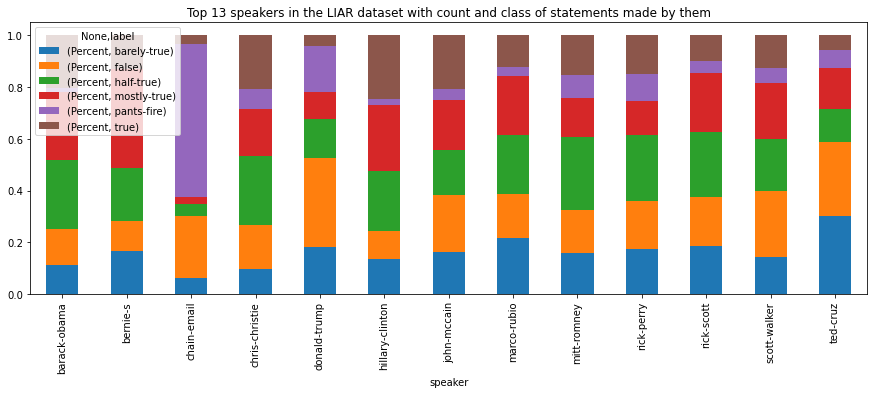

In [32]:
normalised_data.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Top 13 speakers in the LIAR dataset with count and class of statements made by them")

### Exploring the parties who have given statements

In [33]:
# total number of parties
parties_data = df_raw.copy()
parties = parties_data['party'].unique()
print("The total number of parties in LIAR dataset are : %d" % len(parties))
print()
print("Some  parties are:\n", parties.tolist())

The total number of parties in LIAR dataset are : 24

Some  parties are:
 ['democrat', 'none', 'republican', 'organization', 'journalist', 'newsmaker', 'independent', 'libertarian', 'state-official', 'columnist', 'activist', 'tea-party-member', 'labor-leader', 'talk-show-host', 'ocean-state-tea-party-action', 'business-leader', 'county-commissioner', 'constitution-party', 'government-body', 'education-official', 'democratic-farmer-labor', 'green', 'Moderate', 'liberal-party-canada']


In [34]:
# limiting the parties to those which have made frequent statements in the dataset.
parties_count = parties_data.groupby("party").statement.count()
parties = parties_count[parties_count > 20]     # more than 20 statements

print("Number of parties or entities who have made more than 20 statements in the LIAR dataset : %d" % len(parties))
print()
print("Some of the parties and number of statements made by them are :\n", parties[:10])

Number of parties or entities who have made more than 20 statements in the LIAR dataset : 12

Some of the parties and number of statements made by them are :
 party
activist          47
columnist         45
democrat        4150
independent      182
journalist        49
libertarian       51
newsmaker         66
none            2185
organization     265
republican      5687
Name: statement, dtype: int64


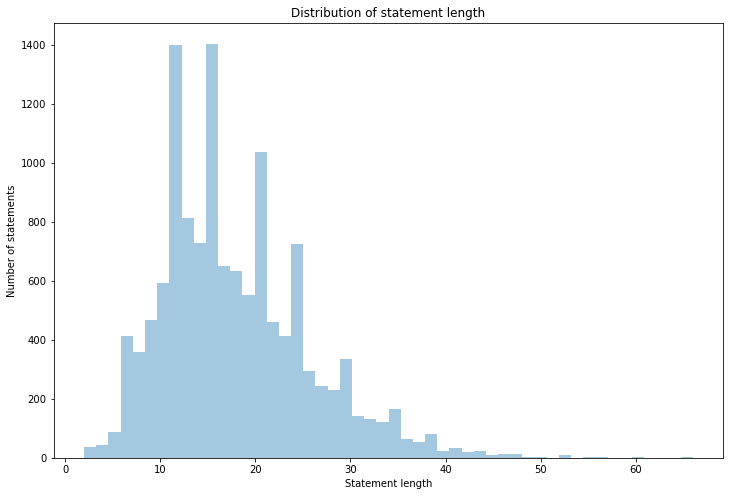

In [41]:
df_raw['statement_length'] = df_raw['statement'].apply(lambda x: len(x.split()))
df_raw['statement_length'].describe()
# plot a histogram to see the distribution of the length of the statements
plt.figure(figsize=(12, 8))
sns.distplot(df_raw['statement_length'], kde=False)
plt.title('Distribution of statement length')
plt.xlabel('Statement length')
plt.ylabel('Number of statements')
plt.show()

In [35]:
# the top 12 parties

parties_data = parties_data[parties_data['party'].isin(parties.keys())]

Text(0.5, 1.0, 'Top 12 parties/entities in the LIAR dataset with count and class of statements made by them')

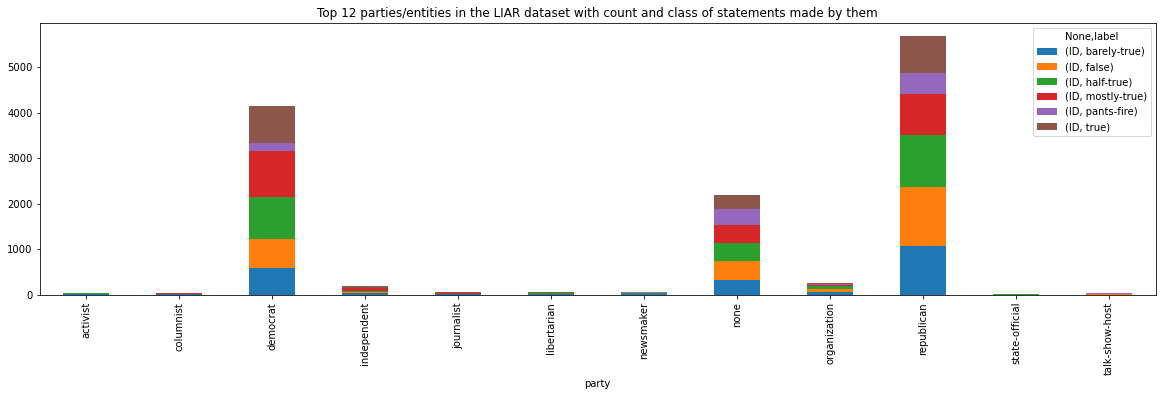

In [36]:
breakdown = class_counts(parties_data, 'party')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(20,5))
plt.title("Top 12 parties/entities in the LIAR dataset with count and class of statements made by them")

### NORMALIZED DATA

Text(0.5, 1.0, 'Top 12 parties/entities in the LIAR dataset with count and class of statements made by them')

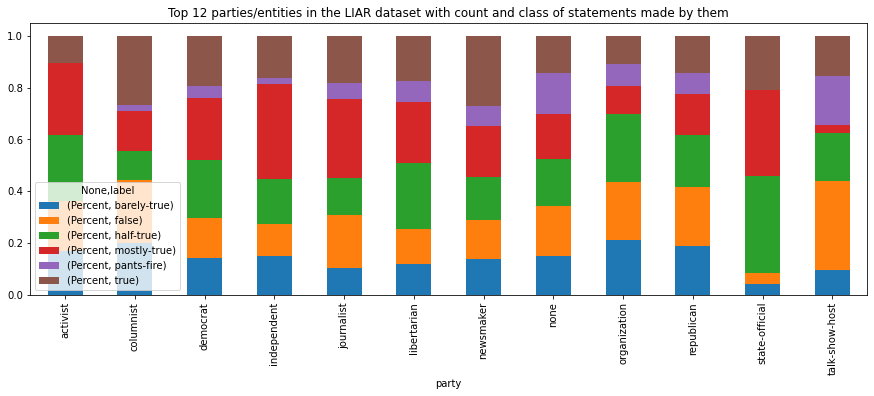

In [37]:
normalized_data = normalize(breakdown, 'party')
normalized_data.unstack().plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Top 12 parties/entities in the LIAR dataset with count and class of statements made by them")

In [36]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


### EMOTION

In [44]:
from textblob import TextBlob

def get_emotion(text):
    emotion_list=[]
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        emotion_list.append(str('positive'))
    elif analysis.sentiment.polarity == 0:
        emotion_list.append(str('neutral'))
    else:
        emotion_list.append(str('negative'))
    return emotion_list

In [45]:
emotion = df_raw['statement'].apply(get_emotion)
# get only str from the list
emotion = emotion.apply(lambda x: x[0])

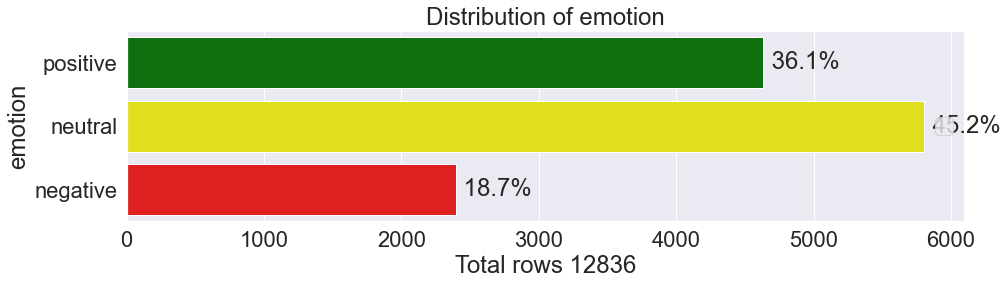

In [56]:
emotion_df = emotion.to_frame(name='emotion')
plot_sns_chart(emotion_df, 'emotion', width=15.0, height=3.5,
                title=f'Distribution of emotion',
                ylabel_title='emotion',
                xlabel_title=f'Total rows {df_raw.shape[0]}',
                colors= {'positive': 'green', 'neutral': 'yellow', 'negative': 'red'})

### Custom pre-processing

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk
nltk.download('maxent_treebank_pos_tagger')


In [45]:
X= df_raw['statement']#features..input features that the model uses and considers to make predictions 
y=df_raw['label']#label...that the model will predict

In [46]:
X.head(5).tolist()

['"McCain opposes a woman\'s right to choose."',
 'The name Frank has risen in popularity by 20 percent since the debut of House of Cardson Netflix.',
 'Says Ted Cruz never denied his father was photographedwith Lee Harvey Oswald.',
 'Its been 14 years since a president or a vice president or a member of their family has not gone and attended at least an event at the Olympics.',
 'In the year 2013, the Obama administration released 104,000 criminal illegal aliens. They released 196 murderers people with homicide convictions, who are here illegally.']

In [47]:
y.head(5)

0           true
1    barely-true
2     pants-fire
3           true
4      half-true
Name: label, dtype: object

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)#stratify:similar class distribution
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

10268 2568
10268 2568


In [49]:
hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
extras_re = re.compile("[.;:!\'?,\"()\[\]]")
#apos_re = "\'[a-z]*"
#leftover_re = "\S+"

""" Preprocessing the text in the statements"""
def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = extras_re.sub("",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text.lower()

# regular expression for custom tokenisation"
tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)") #([]|words|other non-space)

# defining 3 types of tokenisation

def custom_tokenise(text):
    return tokenise_re.findall(text.lower())

def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()#removes the non-alphanumeric characters
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

stopwords_list = stopwords.words('english')

In [50]:
# defining functions
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))
    

# fucntion for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))




    
# function for displaying confusion matrix
def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="BuPu", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

# function for displaying confusion matrix in percentage terms
def confusion_matrix_percent_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    percents = cmdf.div(cmdf.sum(axis=1), axis=0)*100
    dims = (10, 10)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(percents, annot=True, cmap="PiYG", center=0, vmin=0, vmax=100)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])

In [51]:
# fucntion for results of model fitting
def print_scores():
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))


A pipeline in machine learning is a series of processing steps that are chained together to form a workflow. The purpose of a pipeline is to automate and streamline the machine learning workflow, making it easier to train models and make predictions. 

### Creating Pipeline with CountVectorizer 

CountVectorizer is being used as the initial step to convert raw text data into a format suitable for further processing and modeling. It generates a matrix of token counts, which is then passed through subsequent steps such as TF-IDF normalization, feature selection, and model training. Overall, CountVectorizer plays a crucial role in converting raw text data into a numerical representation suitable for machine learning tasks.

In [92]:
model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list)),
    ('norm2', TfidfTransformer(norm=None)),
    ('selector', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])
#this pipeline takes raw text data as input, converts it into a matrix of token counts, applies TF-IDF normalization, 
#selects the top features, and trains a logistic regression classifier on the selected features. 
#This pipeline can then be used for text classification tasks.

In [93]:
# fitting the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()# using the predefined function to display results of the classification

Accuracy:  0.24143302180685358
              precision    recall  f1-score   support

 barely-true       0.25      0.17      0.20       422
       false       0.22      0.40      0.28       502
   half-true       0.24      0.25      0.25       528
 mostly-true       0.26      0.25      0.25       493
  pants-fire       0.32      0.15      0.20       210
        true       0.26      0.15      0.19       413

    accuracy                           0.24      2568
   macro avg       0.26      0.23      0.23      2568
weighted avg       0.25      0.24      0.23      2568

[[ 70 163  85  64  17  23]
 [ 59 202 109  76  18  38]
 [ 60 172 134  94  15  53]
 [ 31 159 120 121   9  53]
 [ 28  84  39  19  31   9]
 [ 29 146  75  93   8  62]]


In [94]:
# limiting the max features to 1000 and checking the model
model.set_params(vectorizer__max_features=1000)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function preprocess at 0x0000016D3D496940>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function Tokenizer at 0x0000016D425EA940>)),
                ('norm2', TfidfTransformer(norm=None)),
                ('selector',
                 SelectKBest(k=1

In [95]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()
# the accuracy is reduced so reverting back without setting max features

Accuracy:  0.23870716510903428
              precision    recall  f1-score   support

 barely-true       0.23      0.20      0.22       422
       false       0.25      0.30      0.27       502
   half-true       0.24      0.24      0.24       528
 mostly-true       0.27      0.27      0.27       493
  pants-fire       0.19      0.17      0.18       210
        true       0.21      0.21      0.21       413

    accuracy                           0.24      2568
   macro avg       0.23      0.23      0.23      2568
weighted avg       0.24      0.24      0.24      2568

[[ 84 113  79  62  29  55]
 [ 70 149  92  71  48  72]
 [ 71 103 125 107  36  86]
 [ 63  86  91 132  22  99]
 [ 32  58  45  21  36  18]
 [ 39  87  90  88  22  87]]


### Using Binalizer rather than tfidftranformer for normalization

In [96]:
model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='word',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list)),
    ('norm', Binarizer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [97]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()


Accuracy:  0.2472741433021807
              precision    recall  f1-score   support

 barely-true       0.25      0.23      0.24       422
       false       0.24      0.28      0.26       502
   half-true       0.27      0.30      0.28       528
 mostly-true       0.25      0.25      0.25       493
  pants-fire       0.24      0.14      0.17       210
        true       0.23      0.21      0.22       413

    accuracy                           0.25      2568
   macro avg       0.24      0.23      0.24      2568
weighted avg       0.25      0.25      0.25      2568

[[ 98 100  94  60  23  47]
 [ 82 140  96  89  28  67]
 [ 67 100 157 103  19  82]
 [ 71  98 108 123   8  85]
 [ 41  57  46  21  29  16]
 [ 35  88  83 104  15  88]]


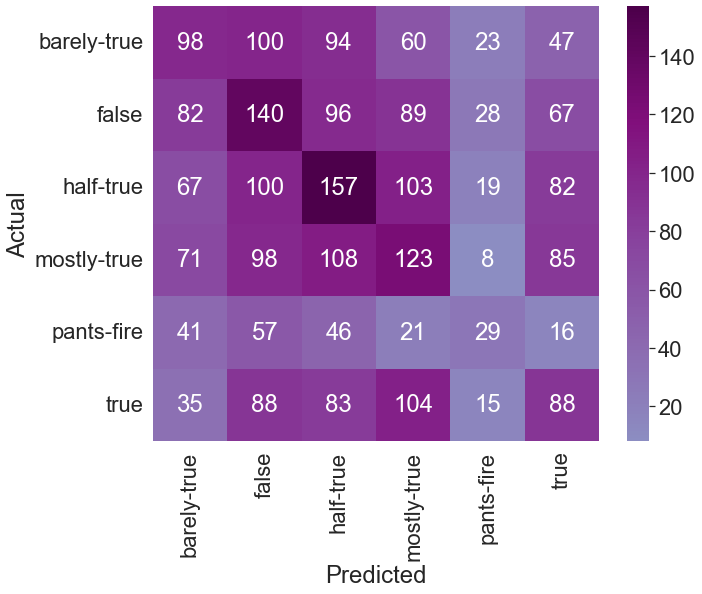

In [98]:
confusion_matrix_heatmap(confusion_matrix(y_test,predictions), model.classes_)

In [99]:
# code to view the selected features
vectorizer = CountVectorizer(analyzer='word')
selector = SelectKBest(chi2, k=100)
feats = vectorizer.fit_transform(X_train)
filtered = selector.fit_transform(feats, y_train)

In [100]:
from itertools import compress
cols = selector.get_support()
names = vectorizer.get_feature_names()

print(list(compress(names,cols)))

['000', '10', '247', 'and', 'average', 'bachmann', 'barack', 'beliefs', 'blue', 'border', 'bulbs', 'care', 'country', 'cross', 'cut', 'debunked', 'duffy', 'face', 'georgia', 'gov', 'half', 'hillary', 'in', 'increased', 'jersey', 'jobs', 'kenyan', 'kloppenburgs', 'landrieu', 'last', 'less', 'lowest', 'lying', 'mcauliffe', 'mccain', 'meat', 'michelle', 'million', 'monument', 'more', 'mormon', 'muslim', 'muslims', 'nose', 'obama', 'obamacare', 'obamas', 'of', 'ops', 'oswald', 'outbreak', 'outlaws', 'percent', 'photographed', 'plan', 'poverty', 'president', 'prisons', 'protein', 'radar', 'rate', 'rep', 'reps', 'retiree', 'richest', 'riot', 'rugs', 'says', 'scheme', 'scott', 'sean', 'sharia', 'sic', 'since', 'socialists', 'society', 'spending', 'sporting', 'states', 'stimulus', 'supports', 'takeover', 'than', 'the', 'three', 'to', 'today', 'top', 'transactions', 'unelected', 'walker', 'wash', 'we', 'wic', 'will', 'wisconsin', 'wording', 'words', 'year', 'your']


In [101]:
# Using Multinomial Naive Bayes classifier
model.set_params(clf=MultinomialNB())

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function preprocess at 0x0000016D3D496940>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function Tokenizer at 0x0000016D425EA940>)),
                ('norm', Binarizer()), ('clf', MultinomialNB())])

In [102]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.24805295950155765
              precision    recall  f1-score   support

 barely-true       0.23      0.21      0.22       422
       false       0.23      0.23      0.23       502
   half-true       0.25      0.36      0.29       528
 mostly-true       0.27      0.33      0.30       493
  pants-fire       0.30      0.08      0.13       210
        true       0.24      0.15      0.18       413

    accuracy                           0.25      2568
   macro avg       0.25      0.23      0.23      2568
weighted avg       0.25      0.25      0.24      2568

[[ 90  93 122  73  12  32]
 [ 84 117 140 100  12  49]
 [ 70  93 191 115  10  49]
 [ 62  73 144 161   3  50]
 [ 43  60  54  24  17  12]
 [ 36  68 125 120   3  61]]


In [104]:
# Fitting C-Support Vector Classifier
model.set_params(clf=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1000))
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.23325545171339565
              precision    recall  f1-score   support

 barely-true       0.20      0.25      0.22       422
       false       0.24      0.28      0.26       502
   half-true       0.27      0.27      0.27       528
 mostly-true       0.25      0.22      0.23       493
  pants-fire       0.21      0.16      0.18       210
        true       0.22      0.17      0.19       413

    accuracy                           0.23      2568
   macro avg       0.23      0.22      0.23      2568
weighted avg       0.23      0.23      0.23      2568

[[104 108  88  51  26  45]
 [117 141  74  74  39  57]
 [105  94 141  93  31  64]
 [ 94  98 107 109  11  74]
 [ 53  58  33  18  33  15]
 [ 59  98  80  90  15  71]]


In [103]:
#Fitting Logical Regression
model.set_params(clf=LogisticRegression())
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.24221183800623053
              precision    recall  f1-score   support

 barely-true       0.24      0.23      0.23       422
       false       0.24      0.27      0.26       502
   half-true       0.27      0.29      0.28       528
 mostly-true       0.25      0.25      0.25       493
  pants-fire       0.24      0.16      0.19       210
        true       0.21      0.20      0.20       413

    accuracy                           0.24      2568
   macro avg       0.24      0.23      0.23      2568
weighted avg       0.24      0.24      0.24      2568

[[ 96 101  92  60  26  47]
 [ 90 137  91  83  31  70]
 [ 72  95 152 101  22  86]
 [ 75  89 108 121   9  91]
 [ 37  57  44  20  34  18]
 [ 38  92  80 104  17  82]]


In [62]:
# fitting Decision tree classifier
decision_tree=tree.DecisionTreeClassifier(random_state=1000)
model.set_params(clf=decision_tree)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.2091121495327103
              precision    recall  f1-score   support

 barely-true       0.18      0.19      0.18       422
       false       0.26      0.26      0.26       502
   half-true       0.24      0.24      0.24       528
 mostly-true       0.20      0.21      0.21       493
  pants-fire       0.10      0.10      0.10       210
        true       0.20      0.18      0.19       413

    accuracy                           0.21      2568
   macro avg       0.20      0.20      0.20      2568
weighted avg       0.21      0.21      0.21      2568

[[ 79  75  89  82  39  58]
 [ 80 132 100  93  41  56]
 [108  92 128  98  28  74]
 [ 81  88  90 105  43  86]
 [ 41  39  49  43  20  18]
 [ 57  82  77  93  31  73]]


In [63]:
# fitting Random forest classifier
model.set_params(clf=RandomForestClassifier(random_state=1000))
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.2632398753894081
              precision    recall  f1-score   support

 barely-true       0.27      0.18      0.22       422
       false       0.27      0.41      0.33       502
   half-true       0.24      0.33      0.28       528
 mostly-true       0.26      0.31      0.28       493
  pants-fire       0.41      0.03      0.06       210
        true       0.29      0.14      0.19       413

    accuracy                           0.26      2568
   macro avg       0.29      0.23      0.23      2568
weighted avg       0.28      0.26      0.25      2568

[[ 78 120 120  79   4  21]
 [ 60 207 126  85   3  21]
 [ 63 125 176 128   1  35]
 [ 28 114 143 151   1  56]
 [ 26  79  57  35   7   6]
 [ 35 119 100 101   1  57]]


In [61]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
# Encode the target variable y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

model.set_params(clf=XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1, random_state=0))
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)

# Print scores
def print_scoresxb():
    print("Accuracy: ", accuracy_score(y_test_encoded, predictions))
    print(classification_report(y_test_encoded, predictions))  # Use the encoded y_test
    print(confusion_matrix(y_test_encoded, predictions))

print_scoresxb()


Accuracy:  0.2542834890965732
              precision    recall  f1-score   support

           0       0.25      0.15      0.19       422
           1       0.25      0.43      0.32       502
           2       0.27      0.34      0.30       528
           3       0.24      0.26      0.25       493
           4       0.21      0.04      0.07       210
           5       0.26      0.15      0.19       413

    accuracy                           0.25      2568
   macro avg       0.25      0.23      0.22      2568
weighted avg       0.25      0.25      0.24      2568

[[ 63 126 125  80   8  20]
 [ 52 215  97  87  15  36]
 [ 46 145 177 106   5  49]
 [ 42 140 121 126   4  60]
 [ 29  87  42  33   9  10]
 [ 25 133  94  96   2  63]]


### Cross Validating the Best Models

Cross-validation is a statistical technique used to evaluate the performance and generalization ability of a machine learning
model. It involves partitioning the dataset into multiple subsets, called folds, and then training the model on a subset of the
data (training set) and evaluating it on another subset (validation set). This process is repeated multiple times, with each 
fold used as both a training set and a validation set.

In [105]:
model.set_params(clf= LogisticRegression(solver='liblinear', random_state=0))

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function preprocess at 0x0000016D3D496940>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function Tokenizer at 0x0000016D425EA940>)),
                ('norm', Binarizer()),
                ('clf',
                 LogisticRegression(random_state=0, solver='liblinear'))])

In [106]:
cv_scores = cross_validate(model, X, y, 
                           cv=StratifiedKFold(n_splits=5, random_state=None), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )

In [107]:
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 24.21%, sd = 1.01%, min = 22.94, max = 25.40
Precision: mean = 24.20%, sd = 1.01%, min = 22.88, max = 25.37
Recall: mean = 24.21%, sd = 1.01%, min = 22.94, max = 25.40
F1: mean = 24.00%, sd = 1.02%, min = 22.77, max = 25.20


In [108]:
model.set_params(clf=MultinomialNB())

Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function preprocess at 0x0000016D3D496940>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function Tokenizer at 0x0000016D425EA940>)),
                ('norm', Binarizer()), ('clf', MultinomialNB())])

In [109]:
cv_scores = cross_validate(model, X, y, 
                           cv=StratifiedKFold(n_splits=5, random_state=None), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )

In [110]:
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 24.32%, sd = 0.65%, min = 23.61, max = 25.32
Precision: mean = 24.46%, sd = 0.77%, min = 23.40, max = 25.28
Recall: mean = 24.32%, sd = 0.65%, min = 23.61, max = 25.32
F1: mean = 23.42%, sd = 0.65%, min = 22.73, max = 24.42


In [111]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.24805295950155765
              precision    recall  f1-score   support

 barely-true       0.23      0.21      0.22       422
       false       0.23      0.23      0.23       502
   half-true       0.25      0.36      0.29       528
 mostly-true       0.27      0.33      0.30       493
  pants-fire       0.30      0.08      0.13       210
        true       0.24      0.15      0.18       413

    accuracy                           0.25      2568
   macro avg       0.25      0.23      0.23      2568
weighted avg       0.25      0.25      0.24      2568

[[ 90  93 122  73  12  32]
 [ 84 117 140 100  12  49]
 [ 70  93 191 115  10  49]
 [ 62  73 144 161   3  50]
 [ 43  60  54  24  17  12]
 [ 36  68 125 120   3  61]]


### Using char_wb instead of word as an analyser

In [64]:
model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char_wb',preprocessor=preprocess,tokenizer=Tokenizer,stop_words=stopwords_list, ngram_range=(1,3))),
    ('norm', Binarizer()),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [65]:
model1.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()



Accuracy:  0.21378504672897197
              precision    recall  f1-score   support

 barely-true       0.18      0.18      0.18       422
       false       0.22      0.24      0.23       502
   half-true       0.25      0.26      0.25       528
 mostly-true       0.24      0.25      0.25       493
  pants-fire       0.15      0.12      0.13       210
        true       0.19      0.17      0.18       413

    accuracy                           0.21      2568
   macro avg       0.20      0.20      0.20      2568
weighted avg       0.21      0.21      0.21      2568

[[ 77  87 100  74  31  53]
 [105 119  87  77  48  66]
 [ 82  97 136 103  25  85]
 [ 72  79 115 121  22  84]
 [ 39  57  41  27  26  20]
 [ 56  93  75  92  27  70]]


In [54]:
model.set_params(clf=MultinomialNB())
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.24182242990654207
              precision    recall  f1-score   support

 barely-true       0.22      0.21      0.22       422
       false       0.24      0.28      0.26       502
   half-true       0.28      0.23      0.25       528
 mostly-true       0.26      0.27      0.26       493
  pants-fire       0.20      0.25      0.22       210
        true       0.24      0.20      0.22       413

    accuracy                           0.24      2568
   macro avg       0.24      0.24      0.24      2568
weighted avg       0.24      0.24      0.24      2568

[[ 89 107  67  74  47  38]
 [ 81 140  76  77  71  57]
 [ 76 104 122 117  41  68]
 [ 65  93  83 134  31  87]
 [ 40  58  24  18  53  17]
 [ 48  90  63 102  27  83]]


In [55]:
decision_tree=tree.DecisionTreeClassifier(random_state=1000)
model.set_params(clf=decision_tree)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.2091121495327103
              precision    recall  f1-score   support

 barely-true       0.18      0.19      0.18       422
       false       0.26      0.26      0.26       502
   half-true       0.24      0.24      0.24       528
 mostly-true       0.20      0.21      0.21       493
  pants-fire       0.10      0.10      0.10       210
        true       0.20      0.18      0.19       413

    accuracy                           0.21      2568
   macro avg       0.20      0.20      0.20      2568
weighted avg       0.21      0.21      0.21      2568

[[ 79  75  89  82  39  58]
 [ 80 132 100  93  41  56]
 [108  92 128  98  28  74]
 [ 81  88  90 105  43  86]
 [ 41  39  49  43  20  18]
 [ 57  82  77  93  31  73]]


In [56]:
model.set_params(clf=LogisticRegression())
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.20210280373831777
              precision    recall  f1-score   support

 barely-true       0.16      0.16      0.16       422
       false       0.21      0.22      0.21       502
   half-true       0.24      0.25      0.24       528
 mostly-true       0.23      0.24      0.23       493
  pants-fire       0.15      0.14      0.15       210
        true       0.17      0.16      0.16       413

    accuracy                           0.20      2568
   macro avg       0.19      0.19      0.19      2568
weighted avg       0.20      0.20      0.20      2568

[[ 69  97  93  69  35  59]
 [ 97 110  91  91  50  63]
 [ 94  92 130 107  27  78]
 [ 71  80 112 116  23  91]
 [ 37  56  38  30  29  20]
 [ 62  89  82  89  26  65]]


In [57]:
model.set_params(clf=RandomForestClassifier(random_state=1000))
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print_scores()

Accuracy:  0.2632398753894081
              precision    recall  f1-score   support

 barely-true       0.27      0.18      0.22       422
       false       0.27      0.41      0.33       502
   half-true       0.24      0.33      0.28       528
 mostly-true       0.26      0.31      0.28       493
  pants-fire       0.41      0.03      0.06       210
        true       0.29      0.14      0.19       413

    accuracy                           0.26      2568
   macro avg       0.29      0.23      0.23      2568
weighted avg       0.28      0.26      0.25      2568

[[ 78 120 120  79   4  21]
 [ 60 207 126  85   3  21]
 [ 63 125 176 128   1  35]
 [ 28 114 143 151   1  56]
 [ 26  79  57  35   7   6]
 [ 35 119 100 101   1  57]]


In [66]:
model.set_params(clf=XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1, random_state=0))
model.fit(X_train, y_train_encoded)
predictions = model.predict(X_test)


print_scoresxb()

Accuracy:  0.2542834890965732
              precision    recall  f1-score   support

           0       0.25      0.15      0.19       422
           1       0.25      0.43      0.32       502
           2       0.27      0.34      0.30       528
           3       0.24      0.26      0.25       493
           4       0.21      0.04      0.07       210
           5       0.26      0.15      0.19       413

    accuracy                           0.25      2568
   macro avg       0.25      0.23      0.22      2568
weighted avg       0.25      0.25      0.24      2568

[[ 63 126 125  80   8  20]
 [ 52 215  97  87  15  36]
 [ 46 145 177 106   5  49]
 [ 42 140 121 126   4  60]
 [ 29  87  42  33   9  10]
 [ 25 133  94  96   2  63]]


# DEEP LEARNING

In [33]:
data1 = data.copy()
data1

,label,statement
0,true,"""McCain opposes a woman's right to choose."""
1,barely-true,The name Frank has risen in popularity by 20 p...
2,pants-fire,Says Ted Cruz never denied his father was phot...
3,true,Its been 14 years since a president or a vice ...
4,half-true,"In the year 2013, the Obama administration rel..."
...,...,...
12831,pants-fire,McDonalds hamburgers are only 15 percent real ...
12832,barely-true,The U.S. has over $62 trillion in unfunded lia...
12833,barely-true,While Arkansas seniors depend on Social Securi...
12834,false,Scientists have shown us (that) the greater po...


In [34]:
# Assuming data is your DataFrame containing a column named 'label'
# data1 is another DataFrame where you want to create a new column 'binary label'

# Define the binary mapping dictionary
binary_map = {
    'true': 1,
    'mostly-true': 1, 
    'half-true': 1,
    'mostly-false': 0,
    'false': 0,
    'pants-fire': 0,
    'barely-true': 0,
}

# Map the values of the 'label' column from data DataFrame to create a new column 'binary label' in data1 DataFrame
data1['label'] = data1['label'].map(binary_map)


In [35]:
data1

,label,statement
0,1,"""McCain opposes a woman's right to choose."""
1,0,The name Frank has risen in popularity by 20 p...
2,0,Says Ted Cruz never denied his father was phot...
3,1,Its been 14 years since a president or a vice ...
4,1,"In the year 2013, the Obama administration rel..."
...,...,...
12831,0,McDonalds hamburgers are only 15 percent real ...
12832,0,The U.S. has over $62 trillion in unfunded lia...
12833,0,While Arkansas seniors depend on Social Securi...
12834,0,Scientists have shown us (that) the greater po...


In [40]:
hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
extras_re = re.compile("[.;:!\'?,\"()\[\]]")
#apos_re = "\'[a-z]*"
#leftover_re = "\S+"

""" Preprocessing the text in the statements"""
def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = extras_re.sub("",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text.lower()

In [41]:
data1['statement']=data1['statement'].apply(lambda x:preprocess(x))
data1.head()

,label,statement
0,1,mccain opposes a womans right to choose
1,0,the name frank has risen in popularity by 20 p...
2,0,says ted cruz never denied his father was phot...
3,1,its been 14 years since a president or a vice ...
4,1,in the year 2013 the obama administration rele...


### Stopwords

In [67]:
stop = stopwords.words('english')
data1['statement'] = data1['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data1.head()

,label,statement
0,1,mccain opposes womans right choose
1,0,name frank risen popularity 20 percent since d...
2,0,says ted cruz never denied father photographed...
3,1,14 years since president vice president member...
4,1,year 2013 obama administration released 104000...


### Stemming and Vectorizer

 Stemming is the process of reducing words to their root or base form. 

In [68]:
news_features=data1.copy()
news_features=news_features[['statement']].reset_index(drop=True)
news_features.head()

,statement
0,mccain opposes womans right choose
1,name frank risen popularity 20 percent since d...
2,says ted cruz never denied father photographed...
3,14 years since president vice president member...
4,year 2013 obama administration released 104000...


In [72]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    statement = re.sub('[^a-zA-Z]', ' ', news_features['statement'][i])
    statement= statement.lower()
    statement = statement.split()
    statement = [ps.stem(word) for word in statement if not word in stop_words]
    statement = ' '.join(statement)
    corpus.append(statement)   

In [74]:
corpus[1]

'name frank risen popular percent sinc debut hous cardson netflix'

### TF-IDF

In [76]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['statement'])
X.shape

(12836, 5000)

In [78]:
y=data1['label']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("")
    else:
        print('')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model selecting

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.5966819880391314
Decision Tree Test Accuracy: 0.5546921399659579
KNN Test Accuracy: 0.5382561437246718
Naive Bayes Test Accuracy: 0.5917754459830566


In [86]:
#Logistic Regression with Hyperparameter Tuning 
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l2', 'none']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.6004985976939856


In [87]:
logreg = LogisticRegression(C=0.5689866029018293, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


Confusion matrix, without normalization


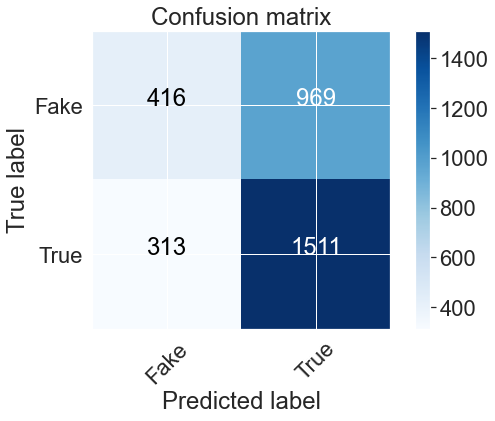

In [90]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Fake','True'])

In [91]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.30      0.39      1385
           1       0.61      0.83      0.70      1824

    accuracy                           0.60      3209
   macro avg       0.59      0.56      0.55      3209
weighted avg       0.59      0.60      0.57      3209



# LSTM

one hot encoding is better for deep learnig models with embedding layer

In [96]:
corpus[2]

'say ted cruz never deni father photographedwith lee harvey oswald'

In [99]:
from tensorflow.keras.preprocessing.text import one_hot
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [111]:
#making the sentences of the same size
#Setting sentence length
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=500

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)


[[   0    0    0 ... 5966 1315 4387]
 [   0    0    0 ... 4122 9409 2079]
 [   0    0    0 ... 2808  795 7138]
 ...
 [   0    0    0 ...  523 9290 9859]
 [   0    0    0 ... 3722 2078  433]
 [   0    0    0 ... 9957 3371 4189]]


In [115]:

embedding_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build((None, 500))  # Specify the input shape (None for batch size, 500 for sentence length)

# Print model summary
print(model.summary())


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 500, 40)        │       400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,501 (1.74 MB)

 Trainable params: 456,501 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [116]:
len(embedded_docs),y.shape

(12836, (12836,))

In [117]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((12836, 500), (12836,))

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 87s 610ms/step - accuracy: 0.5520 - loss: 0.6866 - val_accuracy: 0.6039 - val_loss: 0.6617
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 82s 610ms/step - accuracy: 0.6628 - loss: 0.6214 - val_accuracy: 0.5918 - val_loss: 0.6708
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 80s 595ms/step - accuracy: 0.7273 - loss: 0.5483 - val_accuracy: 0.5932 - val_loss: 0.6945
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - accuracy: 0.7449 - loss: 0.5040 - val_accuracy: 0.5888 - val_loss: 0.7533
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 83s 613ms/step - accuracy: 0.7925 - loss: 0.4402 - val_accuracy: 0.5852 - val_loss: 0.7634
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 600ms/step - accuracy: 0.8167 - loss: 0.3986 - val_accuracy: 0.5781 - val_loss: 0.8828
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 601ms/step - accuracy: 0.8404 - loss: 0.3554 - val_accuracy: 0.5687 - val_loss: 0.9519
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 80s 593ms/step - accuracy: 0.8648 - loss: 0

133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 107ms/step
Confusion matrix, without normalization


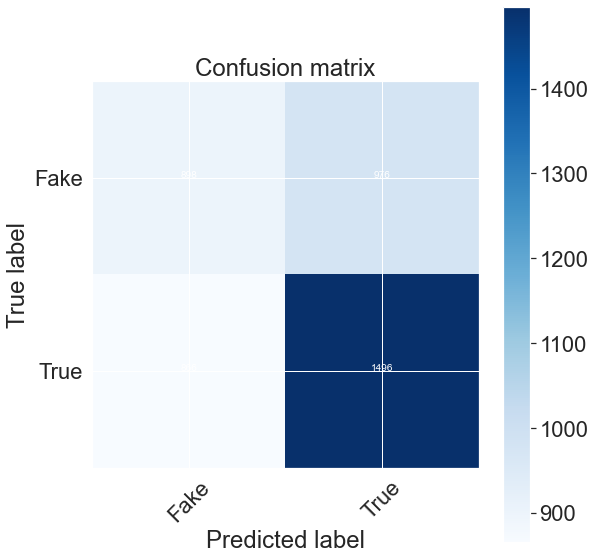

In [127]:
import numpy as np
y_pred=model.predict(X_test)
# Convert probabilities to binary class labels
y_pred_binary = np.round(y_pred).flatten().astype(int)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix with the specified colormap
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm, classes=['Fake','True'])


In [129]:
accuracy_score(y_test,y_pred_binary)

0.5651558073654391

In [130]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1874
           1       0.61      0.63      0.62      2362

    accuracy                           0.57      4236
   macro avg       0.56      0.56      0.56      4236
weighted avg       0.56      0.57      0.56      4236



## BI-directional LSTM

In [133]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.build((None, 500))

print(model1.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 500, 40)        │       400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       112,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513,001 (1.96 MB)

 Trainable params: 513,001 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

None


In [134]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.5441 - loss: 0.6893 - val_accuracy: 0.5595 - val_loss: 0.6805
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 847s 6s/step - accuracy: 0.6727 - loss: 0.6355 - val_accuracy: 0.6027 - val_loss: 0.6686
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 94s 696ms/step - accuracy: 0.7271 - loss: 0.5499 - val_accuracy: 0.5876 - val_loss: 0.7001
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 104s 774ms/step - accuracy: 0.7626 - loss: 0.4985 - val_accuracy: 0.5796 - val_loss: 0.7703
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 115s 850ms/step - accuracy: 0.7766 - loss: 0.4560 - val_accuracy: 0.5663 - val_loss: 0.8295
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8026 - loss: 0.4168 - val_accuracy: 0.5836 - val_loss: 0.8534
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 113s 840ms/step - accuracy: 0.8334 - loss: 0.3614 - val_accuracy: 0.5744 - val_loss: 0.9140
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 425s 3s/step - accuracy: 0.8606 - loss: 0.3149

133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step
Confusion matrix, without normalization


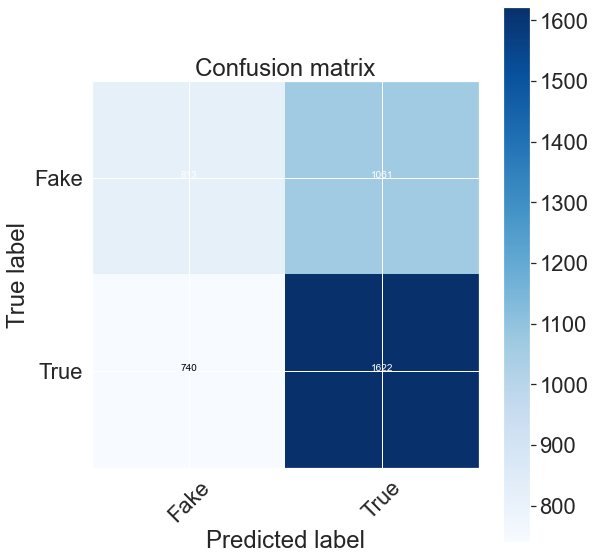

In [137]:
y_pred1=model1.predict(X_test)
y_pred1_binary = np.round(y_pred1).flatten().astype(int)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1_binary)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm,classes=['Fake','True'])

In [138]:
accuracy_score(y_test,y_pred1_binary)

0.5748347497639282

In [139]:
print(classification_report(y_test,y_pred1_binary))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47      1874
           1       0.60      0.69      0.64      2362

    accuracy                           0.57      4236
   macro avg       0.56      0.56      0.56      4236
weighted avg       0.57      0.57      0.57      4236

